# KNN

In [1]:
# Import the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [2]:

from sklearn.utils import resample

# Reading a data from local CSV file
df = pd.read_csv('creditcard.csv')

one = df.loc[df['Class'] == 1]
zero = df.loc[df['Class'] == 0]
zero_res = resample(zero, n_samples=len(one), replace=False, random_state=5)
frame = [one,zero_res]
credit_df = pd.concat(frame)

In [3]:
# Specify the features
feature_columns = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28', 'Amount']

In [4]:
#credit_df.describe()

In [5]:
X = credit_df[feature_columns]
y = credit_df['Class']

y

541       1
623       1
4920      1
6108      1
6329      1
         ..
148275    0
140392    0
201464    0
70112     0
57038     0
Name: Class, Length: 984, dtype: int64

In [6]:
# Specifiyng the k nearest neighbor
k = 3

knn = KNeighborsClassifier(n_neighbors=k)

### Splitting the data into Training set and Testing Set

In [7]:
# Split the dataset randomly into two new datasets (Training Set & Testing Set)
# We use 20% of the data for testing set and the rest 80% for training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148275,2.001070,-0.038246,-0.694090,0.627328,-0.596297,-1.729928,0.188653,-0.380298,0.511534,0.078439,...,-0.268307,-0.233505,-0.551079,0.453779,0.925411,-0.424076,0.141384,-0.070733,-0.051486,0.89
140392,-0.761966,1.357584,-0.012880,0.956207,0.260489,-0.909392,0.757665,-0.108708,-0.316155,0.597339,...,-0.137919,0.221923,0.828093,0.250191,0.417185,-0.830824,-0.479034,-0.386264,0.005194,3.76
201464,-1.294730,1.910609,-1.501656,-1.449619,0.851056,-1.285031,1.342695,-0.046790,0.317833,1.043396,...,0.330102,0.159120,0.848950,-0.208414,-0.386661,-0.150712,0.076926,0.380644,0.214541,3.78
70112,-8.639861,-7.230895,0.628405,1.577939,2.483319,-1.974031,1.021502,-2.678088,2.173468,1.407395,...,-6.929628,-1.734174,0.801580,3.488946,0.627638,1.370061,0.602821,1.168051,-0.640708,237.90


In [9]:
# print the size of the testing set
print(X_test)
print(y_test)

              V1        V2        V3        V4        V5        V6        V7  \
224275  1.757259 -0.023838  0.944493  3.773188 -0.820666  0.855771 -1.165241   
107637 -2.271755 -0.457655 -2.589055  2.230778 -4.278983  0.388610  0.102485   
275992 -2.027135 -1.131890 -1.135194  1.086963 -0.010547  0.423797  3.790880   
27234   0.968323 -0.277971  0.636679  0.770756 -0.038823  1.277333 -0.460520   
169606  2.068391 -0.886484 -2.641213 -2.533639  1.914430  3.037311 -0.768790   
...          ...       ...       ...       ...       ...       ...       ...   
44897  -4.219445 -5.719209  1.008431  1.029213  3.856309 -3.124816 -2.281512   
243449  1.983655 -0.320772 -0.383010  0.396314 -0.414916 -0.136939 -0.553552   
123141 -6.616293  3.563428 -7.058901  4.284346 -5.096299 -1.768618 -4.937554   
154668 -1.929597  4.066413 -4.865184  5.898602 -0.552493 -1.555962 -3.833623   
124036 -0.715414  0.608590  1.155501 -0.267565 -0.563748 -0.618898  0.698308   

              V8        V9       V10  .

### Training Stage

In [10]:
# X_train --> 80% of [V1, V2, V3, .... V28, Amount] which are training set (features)
# y_train --> Class (0 for non-fraudulent & 1 for fraudulent transactions)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Testing Stage

In [11]:
# Make prediction on Testing Set
# Use testing features to predict testing labels based on the training model
# y_predicted is the predicted labels
y_predicted = knn.predict(X_test) 
print(y_predicted)

[0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0
 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 1 0 1 1 0]


### Comparing Actual labels of testing set to Predicted labels for evaluaction

In [12]:
# Compare actual labels of testing set to predicted label
accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)

0.9086294416243654


In [13]:
# Check the mistakes
results = pd.DataFrame()

results['actual'] = y_test
results['prediction'] = y_predicted

print(results)

        actual  prediction
224275       0           0
107637       1           1
275992       1           1
27234        0           0
169606       0           0
...        ...         ...
44897        0           1
243449       0           0
123141       1           1
154668       1           1
124036       1           0

[197 rows x 2 columns]


### Cross Validation for KNN

In [14]:
# import Cross Validation method
from sklearn.model_selection import cross_val_score

In [15]:
KNN_accuracy_list = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

In [16]:
KNN_Accuracy = KNN_accuracy_list.mean()
print(KNN_Accuracy)

0.8993918779633064


# Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
my_decisiontree = DecisionTreeClassifier()

In [19]:
# training 
my_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_predict = my_decisiontree.predict(X_test)

print(y_predict)

[0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1
 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1
 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0
 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0
 0 0 0 0 1 1 0 0 0 1 1 0]


In [21]:
from sklearn.metrics import accuracy_score

#### Decision Tree Classifier accuracy (Splitting Data)

In [22]:
accuracy = accuracy_score(y_test, y_predict)

print(accuracy)

0.9137055837563451


### Cross Validation for Decision Tree Classifier

In [23]:
DT_accuracy_list = cross_val_score(my_decisiontree, X, y, cv=10, scoring='accuracy')

In [24]:
DT_Accuracy = DT_accuracy_list.mean()

In [25]:
print(DT_Accuracy)

0.8952999381570809


# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
my_logistic_regression = LogisticRegression()

# training stage of the logistic regression
my_logistic_regression.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# Get the prediction on testing set (Predicted labels) Logistic Regression
y_predict_LR = my_logistic_regression.predict(X_test)

In [29]:
LR_accuracy = accuracy_score(y_test, y_predict_LR)

#Logistic Regression acuuracy
print(LR_accuracy)

0.934010152284264


### Cross Validation for Logistic Regression

In [30]:
LR_accuracy_list = cross_val_score(my_logistic_regression, X, y, cv=10, scoring='accuracy')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [31]:
LR_accuracy = LR_accuracy_list.mean()

In [32]:
print(LR_accuracy)

0.926839826839827


# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier


# Is n_estimators specifiyng number of tree we want to build?
my_RandomForest = RandomForestClassifier(n_estimators = 28, bootstrap = True, random_state=5)

In [34]:
my_RandomForest.fit(X_train, y_train)

y_pred = my_RandomForest.predict(X_test)

accuracy_score(y_test, y_pred)

0.9390862944162437

### Cross Validation for Random Forest

In [35]:
RF_accuracy_list = cross_val_score(my_RandomForest, X, y, cv=10, scoring='accuracy')

In [36]:
RF_Accuracy = RF_accuracy_list.mean()

In [37]:
print(RF_Accuracy)

0.9369511440940013


# Area Under Curve for ROC (Logistic Regression)

In [38]:
y_predict_LR = my_logistic_regression.predict(X_test)

y_predict_LR_probability = my_logistic_regression.predict_proba(X_test)

In [39]:
from sklearn import metrics

In [40]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_LR_probability[:,1], pos_label=1)
print(fpr)
print(tpr)
thresholds

[0.         0.         0.         0.         0.         0.
 0.         0.05882353 0.05882353 0.12745098 0.12745098 0.14705882
 0.14705882 0.15686275 0.15686275 0.17647059 0.17647059 0.23529412
 0.23529412 0.3627451  0.3627451  0.61764706 0.61764706 1.        ]
[0.         0.01052632 0.08421053 0.10526316 0.17894737 0.2
 0.90526316 0.90526316 0.91578947 0.91578947 0.92631579 0.92631579
 0.94736842 0.94736842 0.95789474 0.95789474 0.96842105 0.96842105
 0.97894737 0.97894737 0.98947368 0.98947368 1.         1.        ]


array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       9.99999997e-01, 9.99999995e-01, 8.80989759e-01, 4.37939670e-01,
       4.11920455e-01, 2.13586281e-01, 2.08423294e-01, 1.93839512e-01,
       1.83231570e-01, 1.79845905e-01, 1.78963309e-01, 1.34953508e-01,
       1.31193683e-01, 1.15312217e-01, 1.14492989e-01, 7.57874142e-02,
       7.28422358e-02, 3.32653606e-02, 3.13149844e-02, 8.41763115e-04])

In [41]:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.9786377708978329


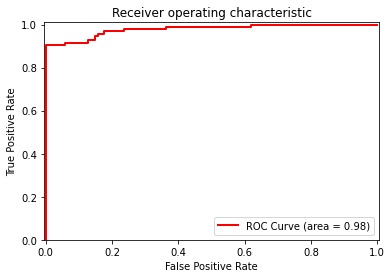

In [42]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
#2 floating point
plt.plot(fpr, tpr, color='red', lw=2,label='ROC Curve (area = %0.2f)' % AUC)



# Defining The Range of X-Axis and Y-Axis:
#shift line  to left
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Area Under Curve for ROC (KNN)

In [43]:
y_predict_KNN = knn.predict(X_test)

y_predict_KNN_probability = knn.predict_proba(X_test)

In [44]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_KNN_probability[:,1], pos_label=1)
print(fpr)
print(tpr)
thresholds

[0.         0.03921569 0.07843137 0.1372549  1.        ]
[0.         0.75789474 0.89473684 0.93684211 1.        ]


array([2.        , 1.        , 0.66666667, 0.33333333, 0.        ])

In [45]:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.9366357069143447


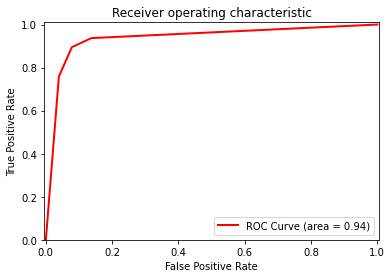

In [46]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
#2 floating point
plt.plot(fpr, tpr, color='red', lw=2,label='ROC Curve (area = %0.2f)' % AUC)



# Defining The Range of X-Axis and Y-Axis:
#shift line  to left
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Area Under Curve for ROC (Decision Tree)

In [47]:
y_predict_DT = my_decisiontree.predict(X_test)

y_predict_DT_probability = my_decisiontree.predict_proba(X_test)

In [48]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_DT_probability[:,1], pos_label=1)
print(fpr)
print(tpr)
thresholds

[0.         0.08823529 1.        ]
[0.         0.91578947 1.        ]


array([2., 1., 0.])

In [49]:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.9137770897832816


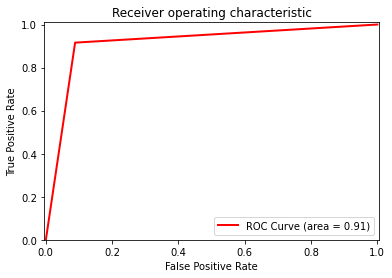

In [50]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
#2 floating point
plt.plot(fpr, tpr, color='red', lw=2,label='ROC Curve (area = %0.2f)' % AUC)



# Defining The Range of X-Axis and Y-Axis:
#shift line  to left
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Area Under Curve for ROC (Random Forest)

In [51]:
y_predict_RF = my_RandomForest.predict(X_test)

y_predict_RF_probability = my_RandomForest.predict_proba(X_test)

In [52]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_RF_probability[:,1], pos_label=1)
print(fpr)
print(tpr)
thresholds

[0.         0.         0.         0.         0.         0.
 0.01960784 0.02941176 0.04901961 0.05882353 0.09803922 0.09803922
 0.11764706 0.14705882 0.2254902  0.29411765 0.37254902 0.55882353
 0.71568627 1.        ]
[0.         0.63157895 0.72631579 0.78947368 0.86315789 0.88421053
 0.88421053 0.89473684 0.90526316 0.91578947 0.91578947 0.92631579
 0.93684211 0.93684211 0.94736842 0.96842105 0.97894737 0.97894737
 0.98947368 1.        ]


array([2.        , 1.        , 0.96428571, 0.92857143, 0.89285714,
       0.78571429, 0.5       , 0.46428571, 0.42857143, 0.39285714,
       0.32142857, 0.28571429, 0.25      , 0.21428571, 0.17857143,
       0.14285714, 0.10714286, 0.07142857, 0.03571429, 0.        ])

In [53]:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.9699174406604747


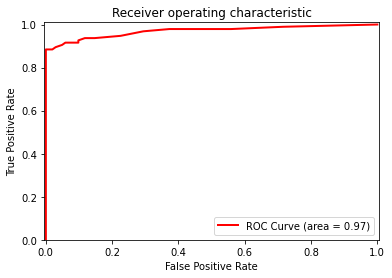

In [54]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
#2 floating point
plt.plot(fpr, tpr, color='red', lw=2,label='ROC Curve (area = %0.2f)' % AUC)



# Defining The Range of X-Axis and Y-Axis:
#shift line  to left
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()